In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('cars.csv')
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.1+ KB


In [4]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
n_cols=df.select_dtypes(include=['int','float']).columns
n_cols

Index(['symboling', 'width', 'height', 'engine-size', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
c_cols=df.select_dtypes(include='O').columns
c_cols

Index(['normalized-losses', 'make', 'fuel-type', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'horsepower'],
      dtype='object')

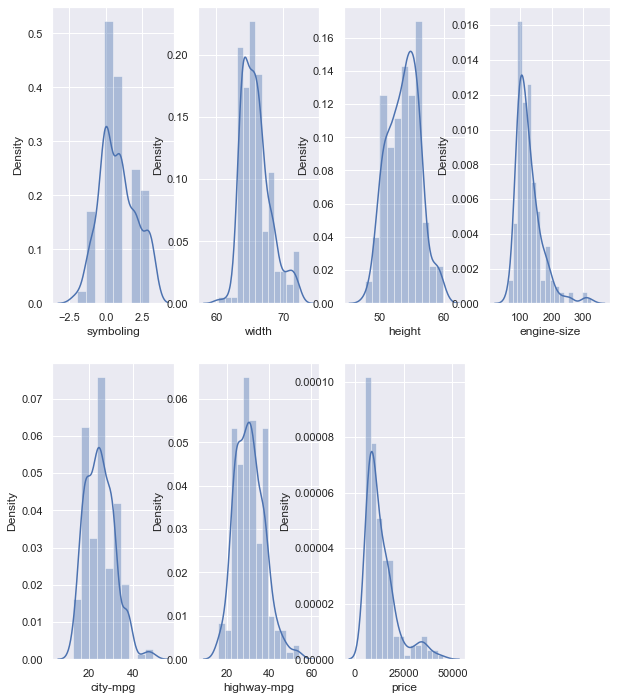

In [7]:
sns.set()
plt.figure(figsize=(10,12))
count=1
for i in n_cols:
    plt.subplot(2,4,count)
    sns.distplot(df[i])
    count+=1
plt.show()

*  symboling range lies between -2 to 3
* average symboling value is 0.8
* Symboling of a car is slightly skewed
* width range lies between 60 to 73
* average width value is 65
* The width of a car is normally distributed
* the height range of cars lies between 47 to 60
* The average height of car is 54
* The height of cars has a minimal skewness
* engine-size lies between 61 to 326
* average engine-size is 127
* The engine is rightly skewed

In [8]:
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


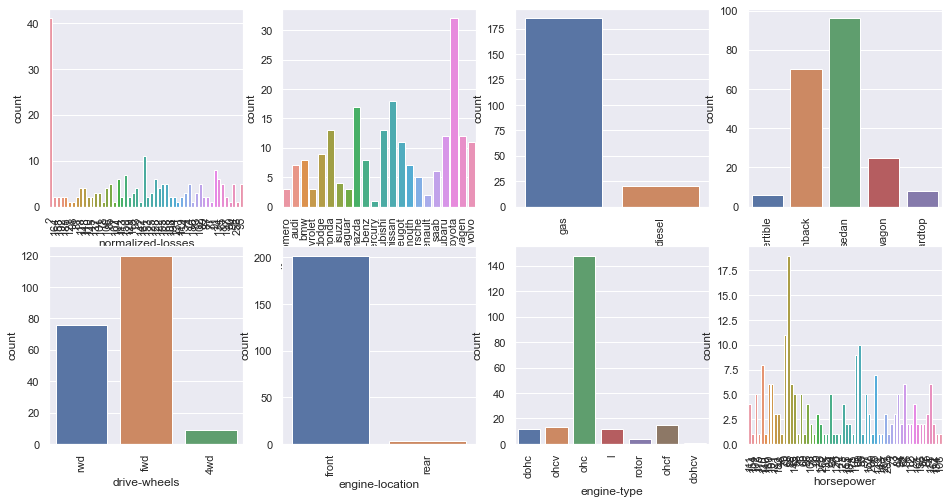

In [9]:
plt.figure(figsize=(16,8))
count=1
for i in c_cols:
    plt.subplot(2,4,count)
    plt.xticks(rotation=90)
    sns.countplot(df[i])
    count+=1
plt.show()

## Bivariate Analysis

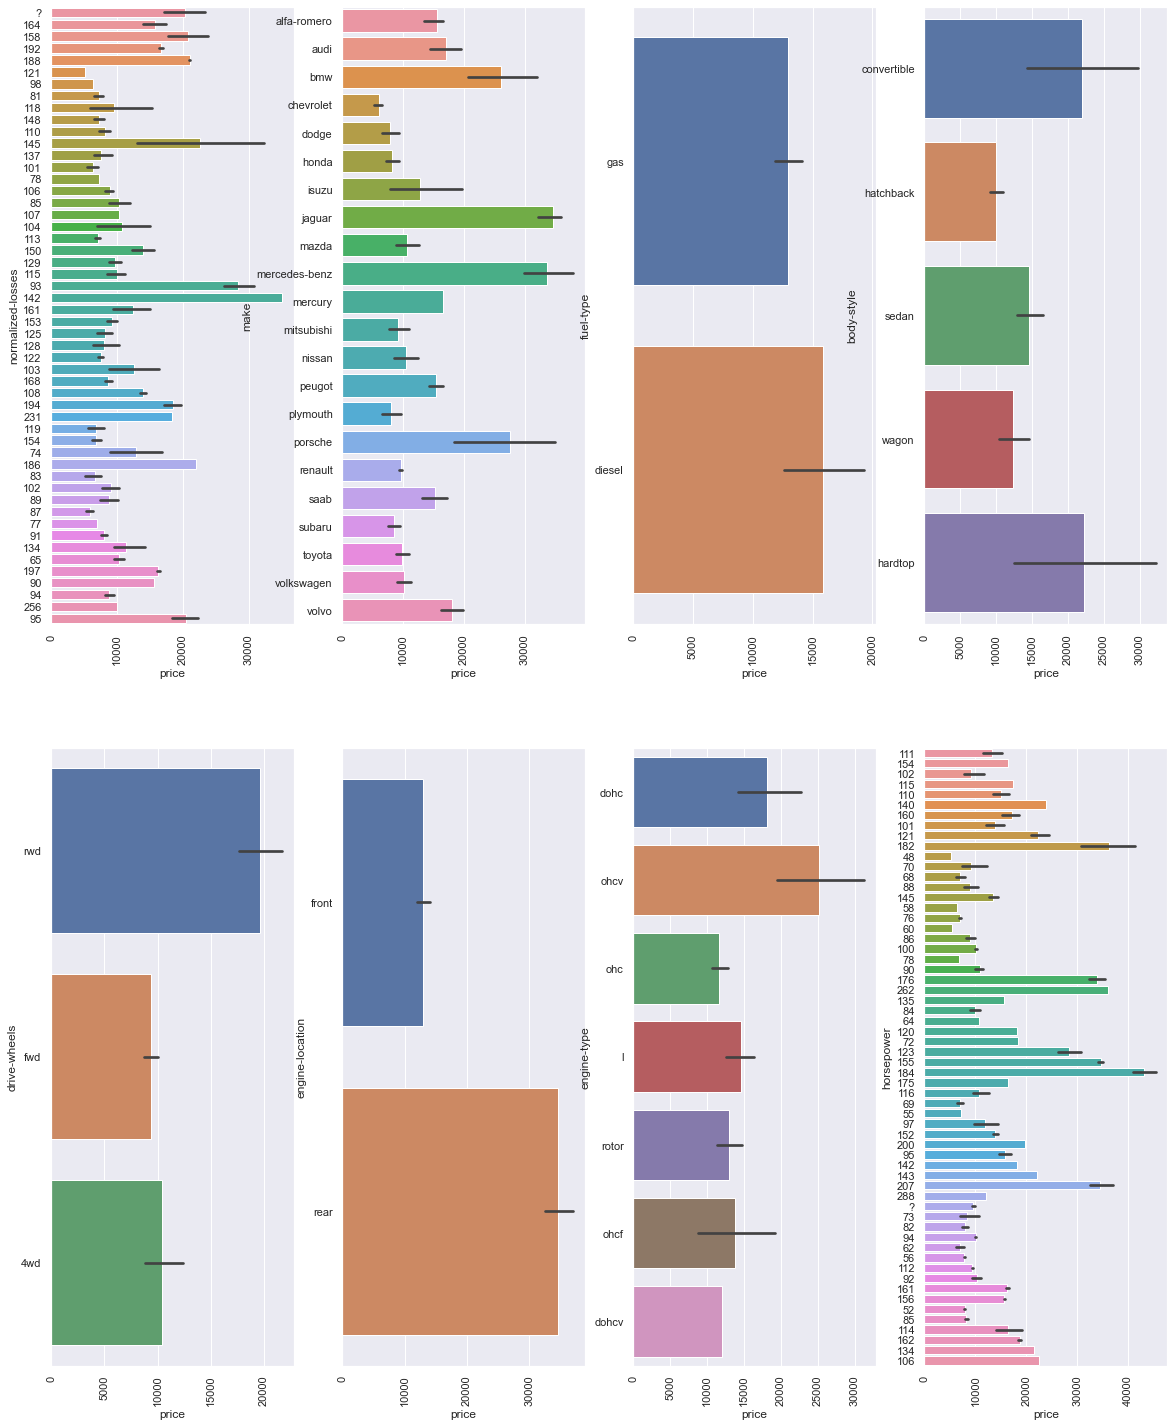

In [10]:
plt.figure(figsize=(20,25))
count=1
for i in c_cols:
    plt.subplot(2,4,count)
    plt.xticks(rotation=90)
    sns.barplot(data=df,x='price',y=i)
    count+=1
plt.show()

In [11]:
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

<AxesSubplot:xlabel='price', ylabel='make'>

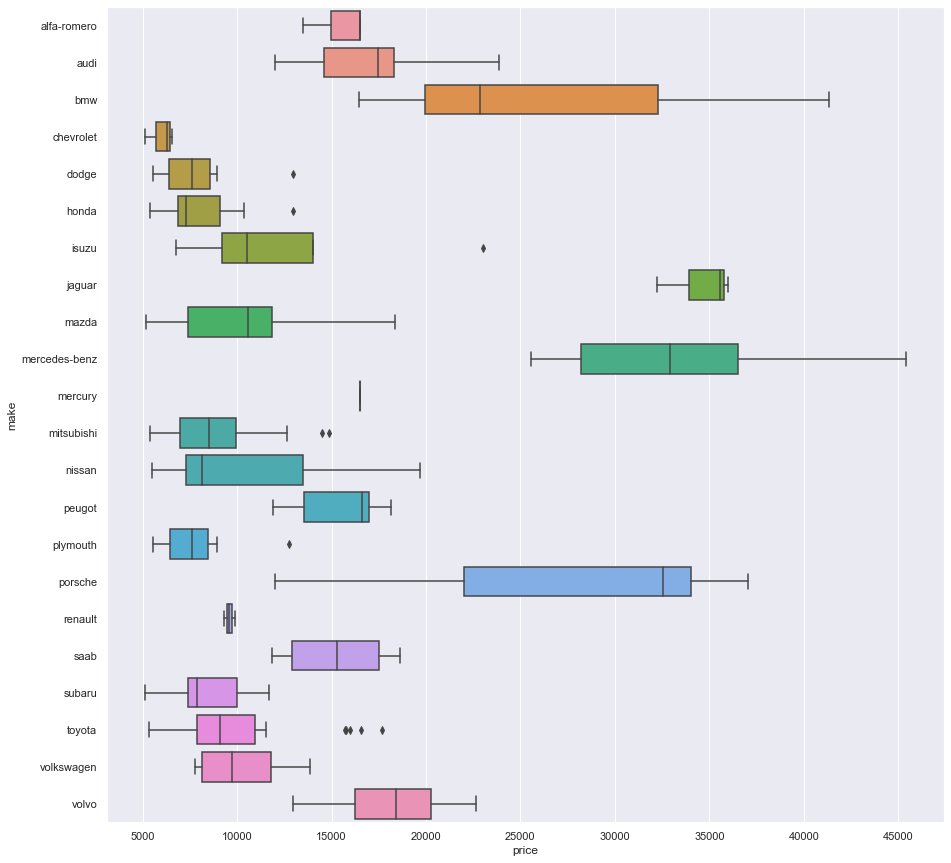

In [12]:
plt.figure(figsize=(15,15))
sns.boxplot(data=df,x='price',y='make')

In [13]:
df.loc[(df['make']=='toyota')&(df['price']>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116,24,30,17669
178,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,20,24,16558
179,3,197,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161,19,24,15998
180,-1,90,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156,20,24,15690
181,-1,?,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156,19,24,15750


In [14]:
df.drop(index=[172,178,179,180,181],inplace=True)

In [15]:
df.loc[(df['make']=='plymouth')&(df['price']>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,?,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145,19,24,12764


In [16]:
df.drop(index=124,inplace=True)

In [17]:
df.loc[(df['make']=='mitsubishi')&(df['price']>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14869
84,3,?,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,14489


In [18]:
df.drop(index=[83,84],inplace=True)

In [19]:
df.loc[(df['make']=='isuzu')&(df['price']>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,?,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70,38,43,23000


In [20]:
df.drop([45],inplace=True)

In [21]:
df.loc[(df['make']=='honda')&(df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101,24,28,12945


In [22]:
df.drop([41],inplace=True)

In [23]:
df.loc[(df['make']=='dodge')&(df['price']>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145,19,24,12964


In [24]:
df.drop([29],inplace=True)

## Handling categorical columns

In [25]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '137', '101', '78', '106', '85', '107', '145', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '94',
       '256', '95'], dtype=object)

In [26]:
df['normalized-losses']=df['normalized-losses'].replace('?',np.nan)

In [27]:
df.isnull().sum()/len(df)*100

symboling             0.000000
normalized-losses    18.556701
make                  0.000000
fuel-type             0.000000
body-style            0.000000
drive-wheels          0.000000
engine-location       0.000000
width                 0.000000
height                0.000000
engine-type           0.000000
engine-size           0.000000
horsepower            0.000000
city-mpg              0.000000
highway-mpg           0.000000
price                 0.000000
dtype: float64

In [28]:
df['normalized-losses']=df['normalized-losses'].astype(float)

In [29]:
df['normalized-losses']=df['normalized-losses'].fillna(df['normalized-losses'].mean())

In [30]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [31]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [32]:
for i in c_cols:
    print('_'*60)
    print(i)
    print(df[i].unique())

____________________________________________________________
normalized-losses
[121.26582278 164.         158.         192.         188.
 121.          98.          81.         118.         148.
 110.         137.         101.          78.         106.
  85.         107.         145.         104.         113.
 150.         129.         115.          93.         142.
 161.         153.         125.         128.         122.
 103.         168.         108.         194.         231.
 119.         154.          74.         186.          83.
 102.          89.          87.          77.          91.
 134.          65.          94.         256.          95.        ]
____________________________________________________________
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
_______________________________________________

In [33]:
df['horsepower']=df['horsepower'].replace('?',np.nan)

In [34]:
df.dropna(inplace=True)

In [35]:
df['horsepower']=df['horsepower'].astype(float)

In [36]:
df['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88.,  58.,  76.,  60.,  86., 100.,  78.,  90., 176.,
       262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175., 116.,
       145.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        73.,  82.,  94.,  62.,  56., 112.,  92.,  52.,  85., 114., 162.,
       134., 106.])

In [37]:
df.reset_index(drop=True,inplace=True)

In [38]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,121.265823,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,121.265823,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.000000,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.000000,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [39]:
le=LabelEncoder()

In [40]:
co_cols=df.select_dtypes(include='O').columns
co_cols

Index(['make', 'fuel-type', 'body-style', 'drive-wheels', 'engine-location',
       'engine-type'],
      dtype='object')

In [41]:
for i in co_cols:
    df[i]=le.fit_transform(df[i])

In [42]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-1,95.000000,20,1,3,2,0,68.9,55.5,3,141,114.0,23,28,16845
188,-1,95.000000,20,1,3,2,0,68.8,55.5,3,141,160.0,19,25,19045
189,-1,95.000000,20,1,3,2,0,68.9,55.5,5,173,134.0,18,23,21485
190,-1,95.000000,20,0,3,2,0,68.9,55.5,3,145,106.0,26,27,22470


In [45]:
high_corr=df.corr()

In [48]:
high_corr[high_corr['price']>0.5]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
drive-wheels,-0.054342,0.301563,-0.038180,-0.142148,-0.148880,1.000000,0.154261,0.473255,-0.019415,-0.054196,0.520036,0.512499,-0.451300,-0.451143,0.583477
width,-0.274301,0.063790,-0.009381,-0.240066,0.145330,0.473255,-0.050845,1.000000,0.299310,0.048510,0.735073,0.644074,-0.641002,-0.678241,0.732925
engine-size,-0.154550,0.086153,-0.094399,-0.082031,-0.059028,0.520036,0.204606,0.735073,0.097229,0.109949,1.000000,0.803988,-0.642661,-0.667162,0.871289
horsepower,0.027090,0.179555,-0.080941,0.155416,-0.145137,0.512499,0.334362,0.644074,-0.078494,0.101790,0.803988,1.000000,-0.797563,-0.761019,0.769899
price,-0.095884,0.125916,-0.167136,-0.114441,-0.064012,0.583477,0.333410,0.732925,0.146548,0.102509,0.871289,0.769899,-0.683241,-0.705532,1.000000


In [50]:
high_corr[high_corr['price']<-0.5]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
city-mpg,0.007903,-0.209346,0.079081,-0.252808,0.016996,-0.451300,-0.162078,-0.641002,-0.080859,-0.152989,-0.642661,-0.797563,1.000000,0.970812,-0.683241
highway-mpg,0.084552,-0.165858,0.073296,-0.186098,-0.025142,-0.451143,-0.109271,-0.678241,-0.143723,-0.152410,-0.667162,-0.761019,0.970812,1.000000,-0.705532


In [51]:
x=df[['drive-wheels','width','engine-size','horsepower','city-mpg','highway-mpg']]
y=df[['price']]

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=123)

In [53]:
x_train.shape

(153, 6)

In [54]:
x_test.shape

(39, 6)

In [55]:
y_train.shape

(153, 1)

In [56]:
y_test.shape

(39, 1)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
mlr=LinearRegression()

In [59]:
mlr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred_train=mlr.predict(x_train)
y_pred_test=mlr.predict(x_test)

In [61]:
from sklearn.metrics import r2_score,mean_squared_error
def model_performance(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
    print('R2 score:{}|RMSE:{}'.format(round(r2,2),round(RMSE,2)))

In [62]:
print('Train Performance')
model_performance(y_train,y_pred_train)

Train Performance
R2 score:0.79|RMSE:3759.38


In [63]:
print('Test Performance')
model_performance(y_test,y_pred_test)

Test Performance
R2 score:0.84|RMSE:2664.52


In [64]:
mlr.coef_

array([[2733.1830747 ,  317.2345585 ,  101.85421419,   16.58601145,
         108.86818974, -285.55897365]])

In [66]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,13495
1,3,121.265823,0,1,0,2,0,64.1,48.8,0,130,111.0,21,27,16500
2,1,121.265823,0,1,2,2,0,65.5,52.4,5,152,154.0,19,26,16500
3,2,164.000000,1,1,3,1,0,66.2,54.3,3,109,102.0,24,30,13950
4,2,164.000000,1,1,3,0,0,66.4,54.3,3,136,115.0,18,22,17450


In [73]:
print('The price of the car should be',mlr.predict([[4,66.2,180,150.0,19,30]])[0])

The price of the car should be [26383.41242443]
